In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Import Data
athletes = pd.read_csv("../data/summerOly_athletes.csv")
counts = pd.read_csv("../data/summerOly_medal_counts.csv")

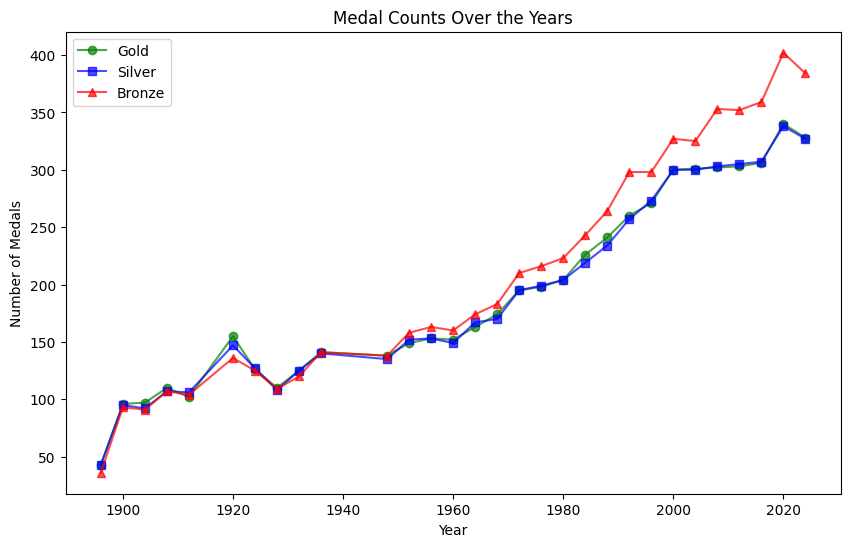

In [45]:
# Total number of medals for each year
medals = counts.groupby('Year').sum()

# Plot the data
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(medals.index, medals['Gold'], label='Gold', color='green', alpha=0.7, marker='o')
plt.plot(medals.index, medals['Silver'], label='Silver', color='blue', alpha=0.7, marker='s')
plt.plot(medals.index, medals['Bronze'], label='Bronze', color='red', alpha=0.7, marker='^')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medal Counts Over the Years')
plt.savefig('figures/medal_counts_over_years.png', dpi=100)
plt.show()


/var/folders/3w/m213gxg96lx5ssww9slm5vl80000gn/T/ipykernel_75900/91764183.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  medals_by_country[i, j] = counts[(counts['Year'] == year) & (counts['NOC'] == country)]['Total']


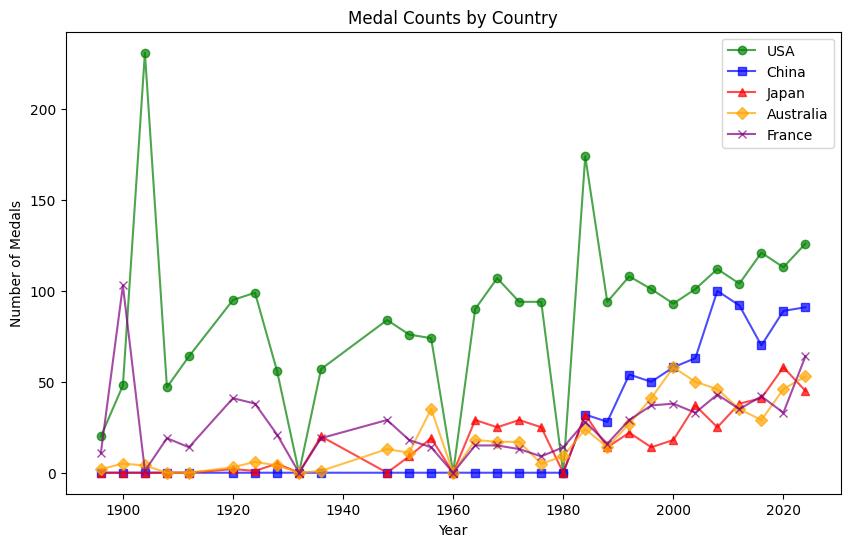

In [46]:
# Number of medals by country
# Select the top 5 countries in 2024 Paris Olympics:
# USA, CHN, JPN, AUS, FRA

# Filter the data for the selected countries
countries = ['United States', 'China', 'Japan', 'Australia', 'France']
years = counts['Year'].unique()

medals_by_country = np.zeros((len(countries), len(years)))
for i, country in enumerate(countries):
    for j, year in enumerate(years):
        if counts[(counts['Year'] == year) & (counts['NOC'] == country)].shape[0] > 0:
            medals_by_country[i, j] = counts[(counts['Year'] == year) & (counts['NOC'] == country)]['Total']
        else:
            medals_by_country[i, j] = 0

# Plot the data in the same figure
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(years, medals_by_country[0], label='USA', color='green', alpha=0.7, marker='o')
plt.plot(years, medals_by_country[1], label='China', color='blue', alpha=0.7, marker='s')
plt.plot(years, medals_by_country[2], label='Japan', color='red', alpha=0.7, marker='^')
plt.plot(years, medals_by_country[3], label='Australia', color='orange', alpha=0.7, marker='D')
plt.plot(years, medals_by_country[4], label='France', color='purple', alpha=0.7, marker='x')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medal Counts by Country')
plt.savefig('figures/medal_counts_by_country.png', dpi=100)
plt.show()

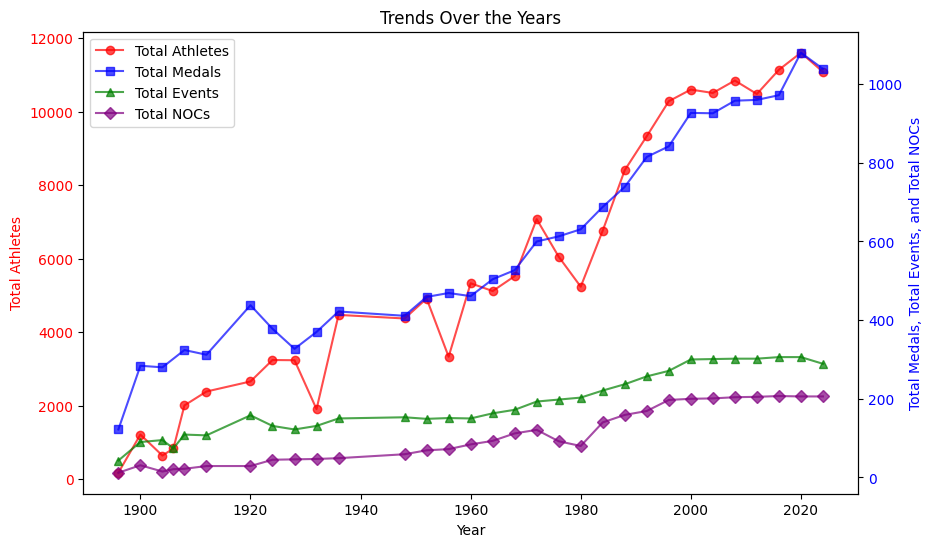

In [51]:
# Trends over the years
totalMedals = counts.groupby("Year")["Total"].sum().reset_index(name="TotalMedals")
totalAthletes = athletes.groupby("Year")["Name"].nunique().reset_index(name="TotalAthletes")
totalEvents = athletes.groupby("Year")["Event"].nunique().reset_index(name="TotalEvents")
totalNOCs = athletes.groupby("Year")["NOC"].nunique().reset_index(name="TotalNOCs")

fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)
ax2 = ax1.twinx()

# Left axis: Total Athletes
line2, = ax1.plot(totalAthletes["Year"], totalAthletes["TotalAthletes"], color="red", label="Total Athletes", alpha=0.7, marker='o')

# Right axis: Total Medals, Total Events, and Total NOCs
line1, = ax2.plot(totalMedals["Year"], totalMedals["TotalMedals"], color="blue", label="Total Medals", alpha=0.7, marker='s')
line3, = ax2.plot(totalEvents["Year"], totalEvents["TotalEvents"], color="green", label="Total Events", alpha=0.7, marker='^')
line4, = ax2.plot(totalNOCs["Year"], totalNOCs["TotalNOCs"], color="purple", label="Total NOCs", alpha=0.7, marker='D')

ax1.set_xlabel("Year")
ax1.set_ylabel("Total Athletes", color="red")
ax2.set_ylabel("Total Medals, Total Events, and Total NOCs", color="blue")
ax1.tick_params(axis='y', labelcolor="red")
ax2.tick_params(axis='y', labelcolor="blue")
lines = [line2, line1, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")
plt.title("Trends Over the Years")
plt.savefig('figures/trends_over_years.png', dpi=100)
plt.show()